In [16]:
from qiskit.circuit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.circuit import QuantumCircuit
from qiskit_ibm_runtime import (
    QiskitRuntimeService,
)
from qiskit import *
from qiskit.providers.fake_provider import GenericBackendV2, Fake127QPulseV1, Fake5QV1

backend = Fake5QV1()
backend

<Fake5QV1('fake_5q_v1')>

# If Statement

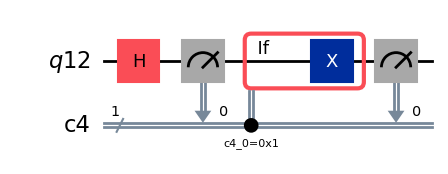

In [17]:
qr = QuantumRegister(1)
cr =ClassicalRegister(1)
circ = QuantumCircuit(qr,cr)

circ.h(qr[0])
circ.measure(qr[0],cr[0])
with circ.if_test((cr[0],1)):
    circ.x(qr[0])
circ.measure(qr[0],cr[0])
circ.draw(output='mpl', style='iqp', cregbundle=True)

# If_Else Statement

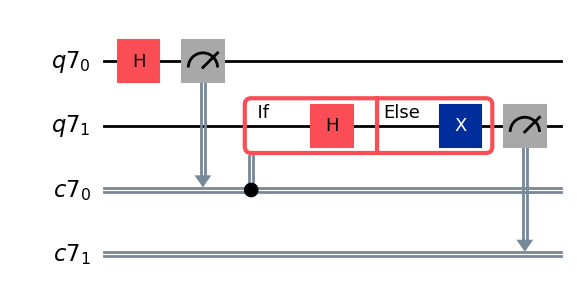

In [10]:
qr = QuantumRegister(2)
cr =ClassicalRegister(2)
circ = QuantumCircuit(qr,cr)
circ.h(qr[0])
circ.measure(qr[0],cr[0])
with circ.if_test((cr[0],1)) as else_:
    circ.h(qr[1])
with else_:
    circ.x(qr[1])
circ.measure(qr[1],cr[1])

circ.draw(output='mpl', style='iqp', cregbundle=False)

# If Else statement on multi qubits {0bxx} method

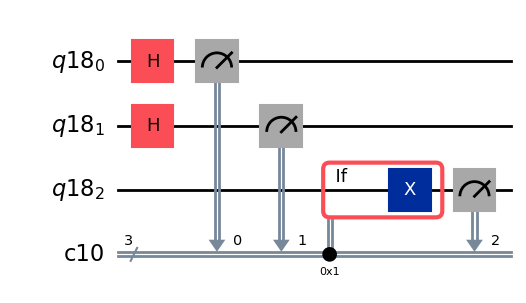

In [24]:
qubits = QuantumRegister(3)
clbits = ClassicalRegister(3)
circuit = QuantumCircuit(qubits, clbits)
(q0, q1, q2) = qubits
(c0, c1, c2) = clbits
 
circuit.h([q0, q1])
circuit.measure(q0, c0)
circuit.measure(q1, c1)
with circuit.if_test((clbits, 0b001)):
    circuit.x(q2)
circuit.measure(q2, c2)
 
circuit.draw("mpl")
 
# example output counts: {'101': 269, '011': 260, '000': 252, '010': 243}

# Switch statement on multi qubits {0bxx} method

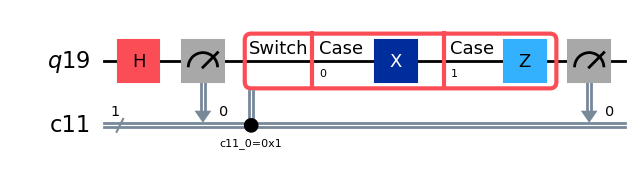

In [25]:
qubits = QuantumRegister(1)
clbits = ClassicalRegister(1)
circuit = QuantumCircuit(qubits, clbits)
(q0,) = qubits
(c0,) = clbits
 
circuit.h(q0)
circuit.measure(q0, c0)
with circuit.switch(c0) as case:
    with case(0):
        circuit.x(q0)
    with case(1):
        circuit.z(q0)
circuit.measure(q0, c0)
 
circuit.draw("mpl")
 
# example output counts: {'1': 1024}

# Switch statement on multi qubits {0bxx} method for more cases

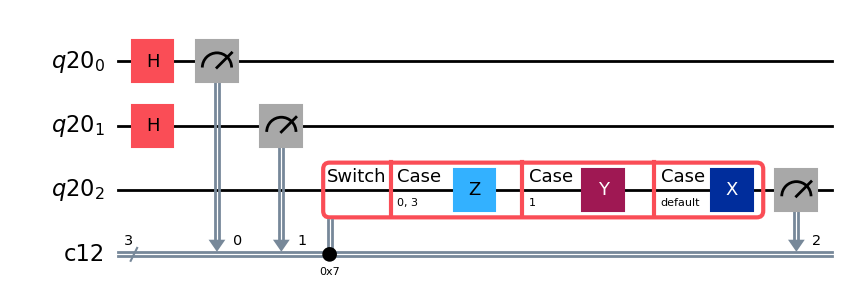

In [26]:
qubits = QuantumRegister(3)
clbits = ClassicalRegister(3)
circuit = QuantumCircuit(qubits, clbits)
(q0, q1, q2) = qubits
(c0, c1, c2) = clbits
 
circuit.h([q0, q1])
circuit.measure(q0, c0)
circuit.measure(q1, c1)
with circuit.switch(clbits) as case:
    with case(0b000, 0b011):
        circuit.z(q2)
    with case(0b001):
        circuit.y(q2)
    with case(case.DEFAULT):
        circuit.x(q2)
circuit.measure(q2, c2)
 
circuit.draw("mpl")
 
# example output counts: {'101': 267, '110': 249, '011': 265, '000': 243}

# For LOOP on X number of gates

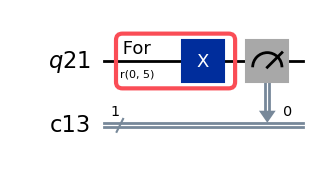

In [27]:
qubits = QuantumRegister(1)
clbits = ClassicalRegister(1)
circuit = QuantumCircuit(qubits, clbits)
(q0,) = qubits
(c0,) = clbits
 
with circuit.for_loop(range(5)) as _:
    circuit.x(q0)
circuit.measure(q0, c0)
 
circuit.draw("mpl")
 
# example output counts: {'1': 1024}

# While Loop on multi qubits {0bxx} method

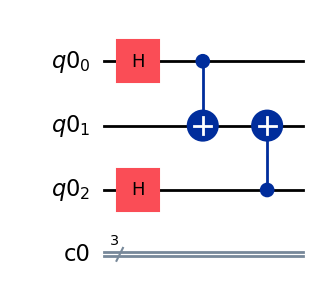

In [1]:
from qiskit import *
qubits = QuantumRegister(3)
clbits = ClassicalRegister(3)
circuit = QuantumCircuit(qubits, clbits)
 
q0, q1, q2 = qubits
c0, c1, c2 = clbits
 
circuit.h([q0, q2])
circuit.cx(q0,q1)
circuit.cx(q2,q1)

 
circuit.draw("mpl")

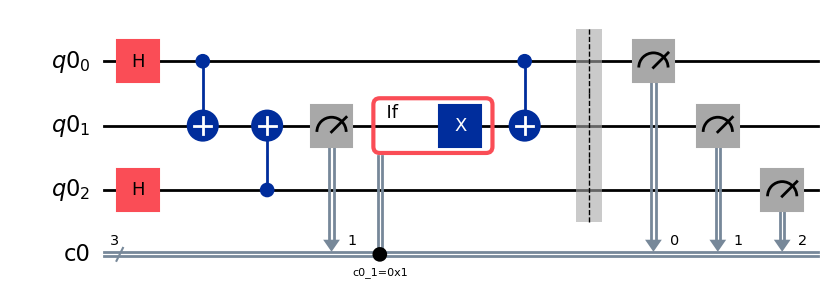

In [2]:
circuit.measure(q1, c1)
with circuit.if_test((c1, 1)):
        circuit.x(q1)

circuit.cx(q0,q1)
circuit.barrier()
circuit.measure([q0,q1,q2],[c0,c1,c2])
circuit.draw('mpl')

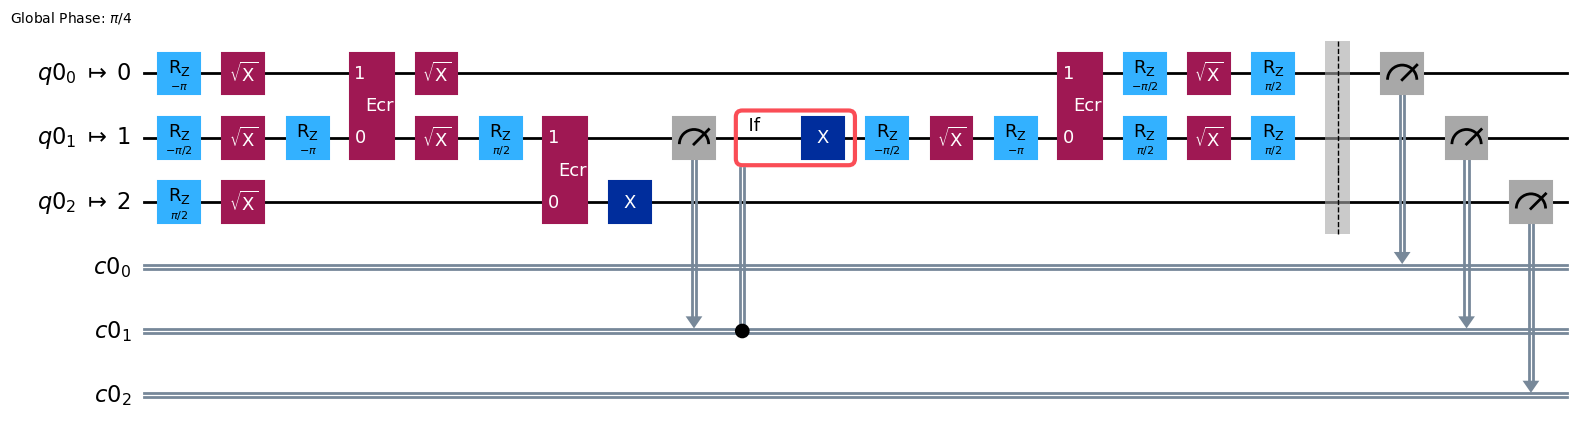

In [3]:
from qiskit_ibm_provider import *
from qiskit_ibm_runtime import (
    QiskitRuntimeService,
)
service = QiskitRuntimeService()
backend = service.least_busy(operational=True, simulator=False)

#backend = service.get_backend('ibm_brisbane')
#provider = IBMProvider()
#provider.backends()
#backend = provider.get_backend('ibmq_qasm_simulator')
built = transpile(circuit, backend)
built.draw(output="mpl", style='iqp', idle_wires=False, cregbundle=False)


In [4]:
job = backend.run(built, dynamic=True)
hardware_counts = job.result().get_counts()
hardware_counts

{'010': 51,
 '000': 1029,
 '110': 65,
 '011': 929,
 '100': 891,
 '001': 48,
 '101': 35,
 '111': 952}

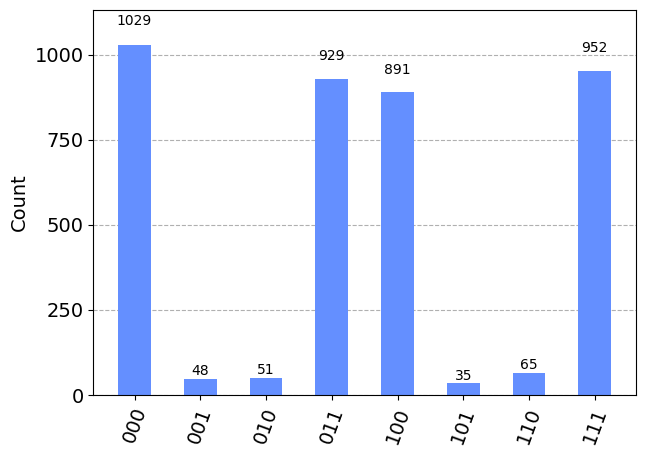

In [6]:
from qiskit.visualization import plot_histogram
plot_histogram(hardware_counts)